In [1]:
# setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Thinking Probabilistically - descrete variables

## Probabilistic logic and statistical inference
Given a set of data, you describe probabilistically what you might expect if those data were acquired again and again and again. This is the heart of *statistical inference*. It is the process by which we go from measured data to probabilistic conclusions about what we might expect if we collected the same data again. Your data speak in the language of probability.

## Random number generators and hacker statistics

### Hacker statistics
The basic idea is that instead of literally repeating the data acquisition over and over again, we can simulate those repeated measurements using Python. For our first simulation, we will take a cue from our forebears. The concepts of probability originated from studies of games of chance



### Bernouili Trial
- an experiment that has two options - success (true) / failure (false)  
If the number we draw is less than point-5, which has a 50% chance of happening, we say we got heads, and we get tails otherwise. This type of experiment, where the result is either True (heads) or False (tails) is referred to as BT.

### Random number seed
The pseudorandom number generator works by starting with an integer, called a seed,and then generates random numbers in succession. The same seed gives the same sequence of random numbers, hence the name, "psuedorandom number generation". So, if you want to have **reproducible** code, it is a good idea to seed the random number generator using the np dot random dot seed function.

In [2]:
# draw a number between 0 and 1
np.random.random()

0.5041942890562685

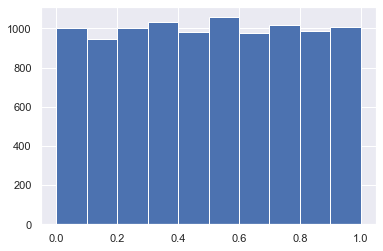

In [2]:
# If the numbers are truly random, all bars in the histogram should be of (close to) equal height.

sns.set()
plt.hist(np.random.random(size = 10000))
plt.show()

In [10]:
# The random number that computer generates is 'psuedorandom number'.
# The same **seed** gives the same sequence of random numbers
#  the same 'psuedorandom number generation' - for reproducible code

# random number seed
np.random.seed(3)

In [15]:
a = np.random.random(size = 4)
a

array([0.02398188, 0.55885409, 0.25925245, 0.4151012 ])

In [16]:
a < 0.5

array([ True, False,  True,  True])

In [17]:
# automatically treat False = 0 and true = 1
np.sum(a<0.5)

3

In [4]:
# get the probability of getting four head in 4 coin flips
# We first initialize the count to zero. 
# We then do 10,000 repeats of the four-flip trials.
n_all_head = 0 # initialize
for i in range (10000):
    heads = np.random.random(size = 4) < 0.5
    if np.sum(heads) == 4:
        n_all_head +=1

p = n_all_head/10000
p

0.0575

### Hacker stats probabilities
- Determine how to simulate data
- simulate many many times..
- probability is approx. fraction of trials with the outcome of interest

With hacker statistics, you pretty much do this same procedure every time. Figure out how to simulate your data, simulate it many many times, and then compute the fraction of trials that had the outcome you're interested in.

#### Exercise case
Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. You would like to know the probability of getting a given number of defaults, given that the probability of a default is p = 0.05. To investigate this, you will do a simulation. You will perform 100 Bernoulli trials using the perform_bernoulli_trials() function you wrote in the previous exercise and record how many defaults we get. Here, a success is a default. (Remember that the word "success" just means that the Bernoulli trial evaluates to True, i.e., did the loan recipient default?) You will do this for another 100 Bernoulli trials. And again and again until we have tried it 1000 times. Then, you will plot a histogram describing the probability of the number of defaults.

In [5]:
# 
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success +=1 

    return n_success

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  del sys.path[0]


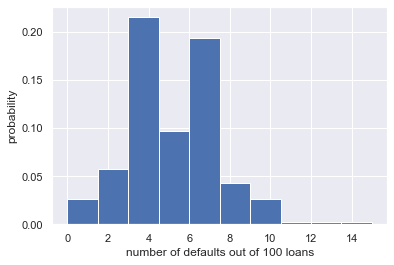

In [6]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100,0.05)


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, normed = True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

In [7]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    # The  data of the ECDF go from 1/n to 1 in equally spaced increments.
    y = np.arange(1,len(data)+1)/len(data)

    return x, y

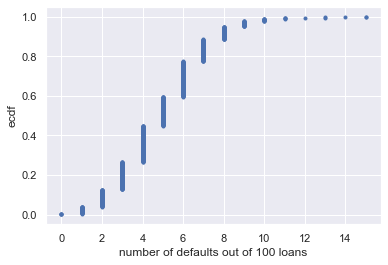

Probability of losing money = 0.022


In [9]:
# Compute ECDF: x, y
x,y = ecdf(n_defaults)

# Plot the ECDF with labeled axes
plt.plot(x,y,marker = '.', linestyle = 'none')
plt.xlabel('number of defaults out of 100 loans')
plt.ylabel('ecdf')

# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))


As we might expect, we most likely get 5/100 defaults (100 * 0.05). But we still have about a 2% chance of getting 10 or more defaults out of 100 loans.

## Probability distributions and stories - the Binomial distribution


### Probability mass function (PMF)
The set of probabilities of discrete outcomes.

### Discrete uniform PMF
the probability of an event is discrete because only certain values may be attained - rolling a dice. You can't get 3/7 with a die. each result has the same, uniform probability, 1/6.

### Binomial distribution
- number r of successes in Bernoulli trials (an experiment that has two options) with probability p of success, is binomially distributed
- the number r of heads in 4 coin flips with probability of 0.5 of heads, is binomially distributed

In [15]:
# 60 trials (coin flips) and p success (heads)
np.random.binomial(60, 0.1)

29

In [25]:
# Repeat the flips over and over again - 10 simulations
samples = np.random.binomial(60,0.1,size = 10000)
samples

array([ 6,  6,  4, ..., 10,  8,  4])

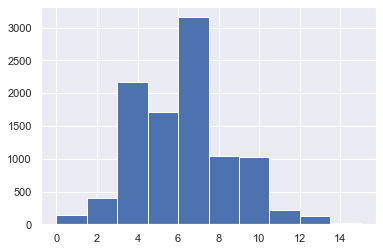

In [27]:
plt.hist(samples, linestyle = 'solid')
plt.show()

As expected, we are most likely to get a number of success of 6 out of 60 (60 * p_success), but we may expect to get as many as 12 or as few as 1

CDF is easier to plot than hist

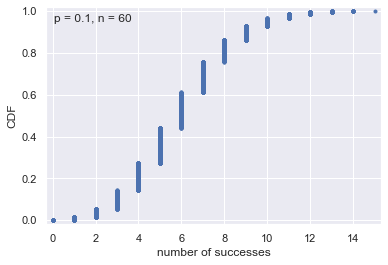

In [38]:
sns.set()
x,y = ecdf(samples)
plt.plot(x,y,
        marker = '.', linestyle = 'none')
plt.margins(0.02)
plt.xlabel('number of successes')
plt.ylabel('CDF')
plt.annotate('p = 0.1, n = 60',xy=(0.05, 0.95))
plt.show()

## Poisson process and the Poisson Distribution

### Poisson Process
- The timing of the next event is **completely independent** of when the previuos event happened.  
e.g. a town where the bus schedule is erratic. You can be waiting for a bus but at the same time another bus arrived. or you can wait for a bus and takes hours for the next one to arrive.

Examples:  
- Natural birth in a given hospital
- Hit on a website during a given hour
- Meteor strikes
- Molecular collisions in a gas
- Aviation incidents
- Buses in Poissonville (that town)


### Poisson distribution
- The number r of arrivals of a Poisson process in a given time interval with average rate of ? arrivals per interval is Poisson distributed
- The number r of hits on a website in one hour with an average hit rate of 6 hits per hour is Poisson distbributed

The Poisson distribution has one parameter, the average number of arrivals in a given length of time. So, to match the story, we could consider the number of hits on a website in an hour with an average of six hits per hour. This is Poisson distributed.

### Poisson PMF
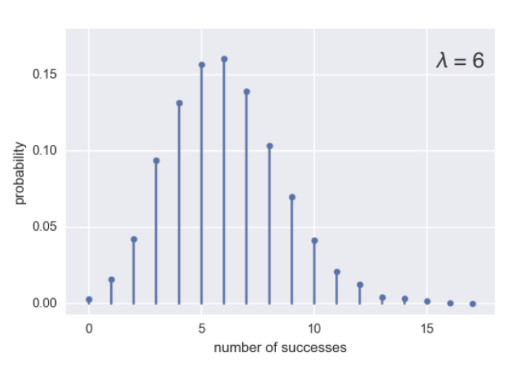
Let's take a look at the PMF for this example. For a given hour, we are most likely to get 6 hits, which is the average, but we may get more than ten, or possibly none. You might notice that this looks an awful lot like the Binomial PMF we looked at in the last video. This is because the Poisson distribution

### Poisson Distribution
- Limit of the Binomial distribution for low probability of success and large number of trials 
- for rare events  
is a limit of the Binomial distribution for low probability of success and large number of trials, ie for rare events. You'll explore this relationship further in the following interactive exercises.

### The Poisson CDF
To sample from the Poisson distribution, we use np dot random dot poisson. It also has the size keyword argument to allow multiple samples. Let's use this function to generate the Poisson CDF. After that it is the usual procedure of computing the ECDF, plotting it, and labeling axes.

### The Poisson CDF
The result, predictably, looks like the Binomial CDF we saw in the last video.

In [39]:
samples = np.random.poisson(6, size = 10000)
samples

array([12,  6,  6, ...,  7,  6, 11])

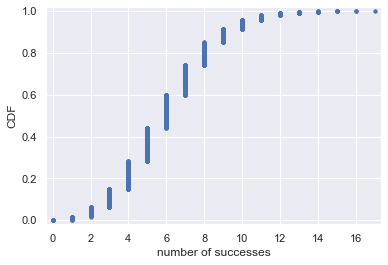

In [40]:
x,y = ecdf(samples)

plt.plot(x,y, marker = '.', linestyle = 'none')
plt.margins(0.02)

plt.xlabel('number of successes')
plt.ylabel('CDF')
plt.show()

#### Sample experiment of binomial vs poisson
Why poisson distribution is the rare case of binomial.

Binomial distribution for low probability of success and large number of trials, ie for rare events. 

In [41]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10,10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]


# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i],p[i],size = 10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))


Poisson:      9.9854 3.1455026370995145
n = 20 Binom: 10.0329 2.231729730500537
n = 100 Binom: 9.9575 3.0061094041967267
n = 1000 Binom: 10.0498 3.1360994818404597


he means are all about the same, which can be shown to be true by doing some pen-and-paper work. The standard deviation of the Binomial distribution gets closer and closer to that of the Poisson distribution as the probability p gets lower and lower.

When we have rare events (**low p, high sample size (n)**), the Binomial distribution is Poisson. This has a single parameter, the mean number of successes per time interval, in our case the mean number of no-hitters per season.

### Sample case of calculating P
1990 and 2015 featured the most no-hitters of any season of baseball (there were seven). Given that there are on average 251/115 no-hitters per season, what is the probability of having seven or more in a season?

In [ ]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115, size = 10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters >= 7)

# Compute probability of getting seven or more: p_large
p_large = n_large/10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)


The result is about 0.007. This means that it is not that improbable to see a 7-or-more no-hitter season in a century. We have seen two in a century and a half, so it is not unreasonable.

# Thinking probabilistically - continuous variables
So far, we have talked about probabilities of discrete quantities, such as die rolls and number of bus arrivals, but what about continuous quantities?

A continuous quantity can take on any value, not just discrete ones. For example, the speed of a train can be 45-point-76 km/h.

Continuous variables also have **probability distributions.** Let's consider an example. In 1879, Albert Michelson performed 100 measurements of the speed of light in air.

## Probability density functions
This is the continuous analog to the probability mass function, the PMF. It describes the chances of observing a value of a continuous variable. The probability of observing a single value of the speed of light does not make sense, because there is an infinity of numbers, say between 299-point-6 and 300-point-0 megameters per second. Instead, areas under the PDF give probabilities. So, the probability of measuring that the speed of light is greater than 300,000 km/s is an area under the normal curve. 

### Normal PDF
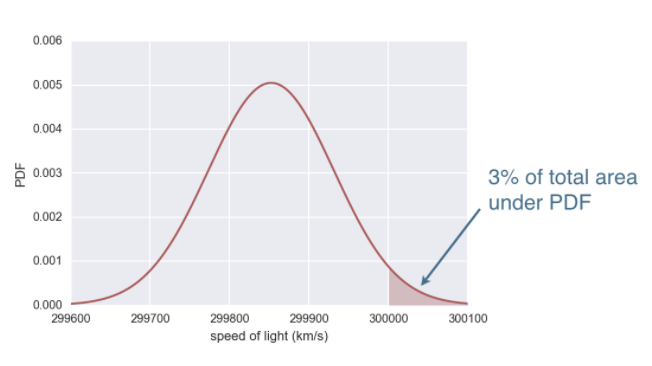
Parametrizing the PDF based on Michelson's experiments, this is about a 3% chance, since the pink region is about 3% of the total area under the PDF. To do this calculation, we were really just looking at the cumulative distribution function,

### Normal CDF
or CDF, of the Normal distribution. Here is the CDF of the Normal distribution. Remember that the CDF gives the probability the measured speed of light will be less than the value on the x-axis. So, reading off the value at 300,000 km/s,

we see that there is a 97% chance that a speed of light measurement is less than that. So, there is about a 3% change it is greater. We will study the Normal distribution in more depth in the coming exercises, but for right now,

## Normal Distribution
it describes a continuous variable whose PDF is symmetric and has a single peak. The Normal distribution is parametrized by two parameters.
 
- **mean**: center of the peak
- **std dev**: how wide the peak is / how spread out the data are

*callout*
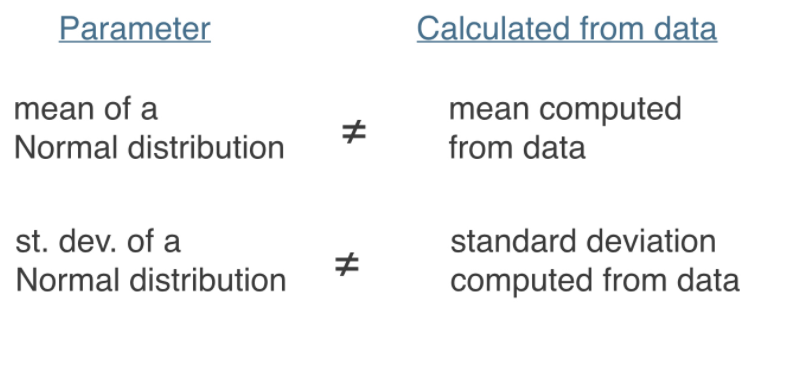


### Normal PDF & histogram
Now, if we add a histogram of the Michelson measurements, we see that the measured speed of light in air looks to be Normally distributed. Comparing the histogram to the PDF suffers from binning bias, so it is better to compare the ECDF of the data to the theoretical CDF of the Normal distribution. To compute the theoretical CDF, we can use np dot random dot normal to draw samples and then we can compute the CDF.

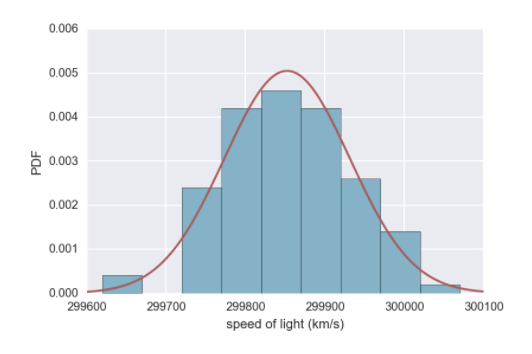

As was the case with sampling out of the binomial distribution, we need to provide parameters, in this case the mean and standard deviation, to parametrize the Normal distribution we are sampling out of. The mean and standard deviations computed from the data are good estimates, so we'll compute them and pass them into np dot random dot normal to take our samples. We then use the function we already wrote to compute the ECDFs of the data and of the Normally distributed theoretical samples we just drew.

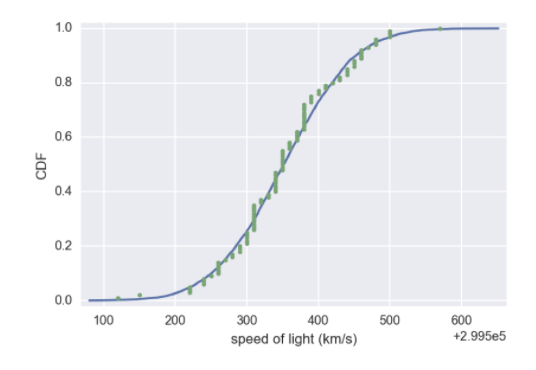

With the absence of binning bias, it is much clearer that the Michelson data are approximately Normally distributed.



### Practice - Normal PDF


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # This is added back by InteractiveShellApp.init_path()


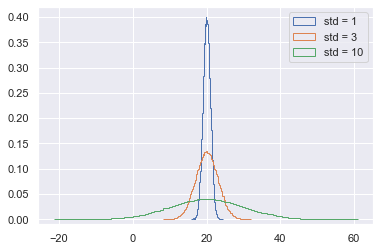

In [42]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20,1, size = 100000)
samples_std3 = np.random.normal(20,3,size = 100000)
samples_std10 = np.random.normal(20,10,size = 100000)

# Make histograms
plt.hist(samples_std1,bins = 100,normed = True, histtype = 'step')

plt.hist(samples_std3,bins = 100,normed = True, histtype = 'step')

plt.hist(samples_std10,bins = 100,normed = True, histtype = 'step')

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()


### Practice - Normal CDF

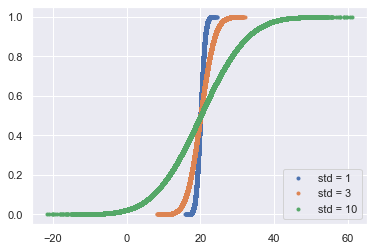

In [43]:
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
plt.plot(x_std1, y_std1, marker = '.', linestyle = 'none')
plt.plot(x_std3, y_std3, marker = '.', linestyle = 'none')
plt.plot(x_std10, y_std10, marker = '.', linestyle = 'none')


# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()


he CDFs all pass through the mean at the 50th percentile; the mean and median of a Normal distribution are equal. The width of the CDF varies with the standard deviation.

## Normal distribution - Properties and warnings
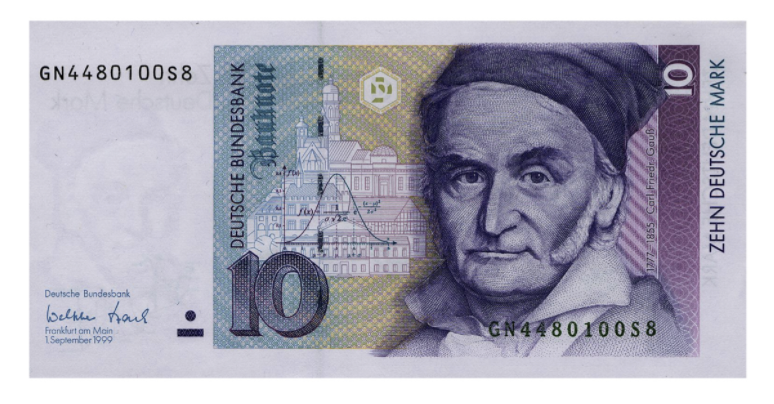

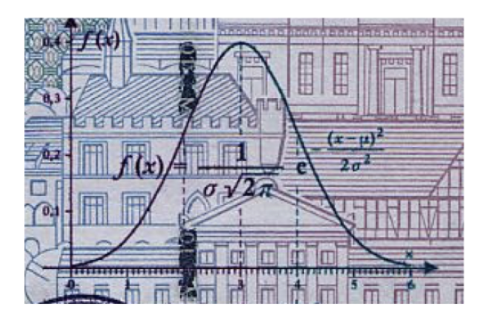
10 Deutschmark bill. It was retired in 2002 with the adoption of the Euro by Germany. The man pictured on this bill is Karl Gauss

### The Gaussian distribution
the Normal distribution! It is often also called the Gaussian distribution, after its inventor.

There are important caveats about the distribution and we need to be careful when using it. 
- often times things you may think are Normally distributed are not.
- the lightness of its tails. 

If we look at the Normal distribution, the probability of being more than four standard deviations from the mean is very small. This means that when you are modeling data as Normally distributed, outliers are extremely unlikely. Real data sets often have extreme values, and when this happens, the Normal distribution might not be the best description of your data.

#### Example case
Consider for example large mouth bass in Massachusetts lakes measured in 1994 and 1995 by the Massachusetts Department of Environmental Protection. If we look at a histogram of the length of the 316 fish they measured, they appear to be Normally distributed. Indeed, when we look at

1. Length of MA large mouth bass

the ECDF overlayed with a theoretical Normal CDF, the measurements look close to Normally distributed. There are some systematic differences, though, especially on the left tail. So this is not quite a Normal distribution, 

but we might not be making too big of an error by treating it as so.

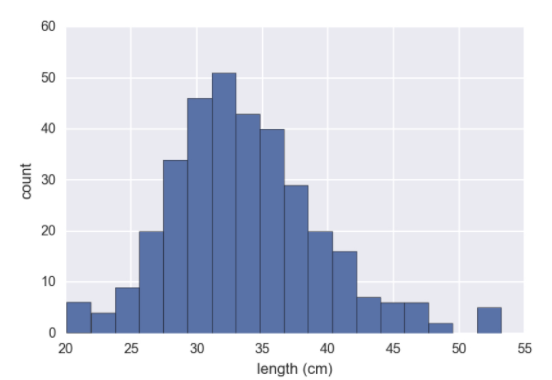

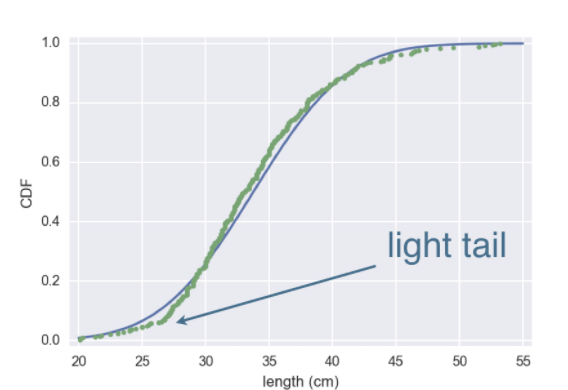

2. Mass of MA large mouth bass

Now, let's consider the mass of the bass. One might think that since the length of these bass is close to Normally distributed, the mass should be also. When we overlay the theoretical Normal CDF on the ECDF of the data, it is not even close. Seeing this immediately shows us that our initial thought was incorrect. Another important issue to keep in mind when using the Normal distribution is

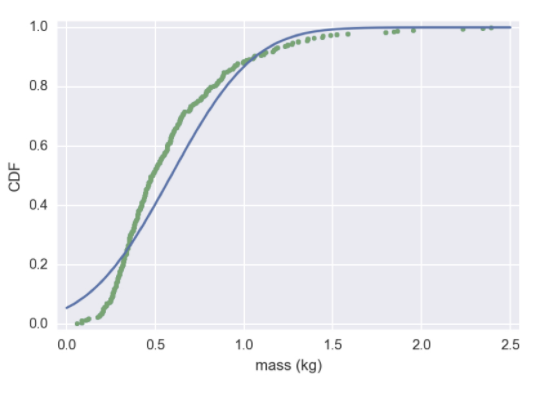

Caveat 2:
- Light tails of the Normal distribution

the lightness of its tails. If we look at the Normal distribution, the probability of being
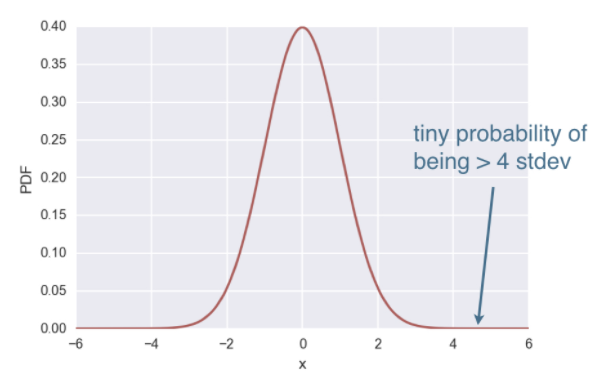
more than four standard deviations from the mean is very small. This means that when you are modeling data as Normally distributed, outliers are extremely unlikely. Real data sets often have extreme values, and when this happens, the Normal distribution might not be the best description of your data.

### Practice - 

Since 1926, the Belmont Stakes is a 1.5 mile-long race of 3-year old thoroughbred horses. Secretariat ran the fastest Belmont Stakes in history in 1973. While that was the fastest year, 1970 was the slowest because of unusually wet and sloppy conditions. With these two outliers removed from the data set, compute the mean and standard deviation of the Belmont winners' times. Sample out of a Normal distribution with this mean and standard deviation using the np.random.normal() function and plot a CDF. Overlay the ECDF from the winning Belmont times. Are these close to Normally distributed?

In [66]:
belmont_no_outliers = '''148.51 146.65 148.52 150.7  150.42 150.88 151.57 147.54 149.65 148.74
 147.86 148.75 147.5  148.26 149.71 146.56 151.19 147.88 149.16 148.82
 148.96 152.02 146.82 149.97 146.13 148.1  147.2  146.   146.4  148.2
 149.8  147.   147.2  147.8  148.2  149.   149.8  148.6  146.8  149.6
 149.   148.2  149.2  148.   150.4  148.8  147.2  148.8  149.6  148.4
 148.4  150.2  148.8  149.2  149.2  148.4  150.2  146.6  149.8  149.
 150.8  148.6  150.2  149.   148.6  150.2  148.2  149.4  150.8  150.2
 152.2  148.2  149.2  151.   149.6  149.6  149.4  148.6  150.   150.6
 149.2  152.6  152.8  149.6  151.6  152.8  153.2  152.4  152.2'''.replace(' ',',')
 

In [67]:
belmont_no_outliers = belmont_no_outliers.replace(',,,',',').replace(',,',',').split(',')
belmont_no_outliers = [float(i.replace('\n','')) for i in belmont_no_outliers]


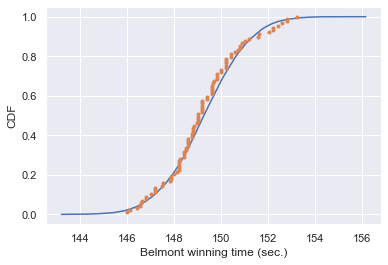

In [68]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size = 10000)

# Get the CDF of the samples and of the data
x,y = ecdf(belmont_no_outliers)
x_theor, y_theor = ecdf(samples)


# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()


Assume that the Belmont winners' times are Normally distributed (with the 1970 and 1973 years removed), what is the probability that the winner of a given Belmont Stakes will run it as fast or faster than Secretariat?

In [69]:
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu,sigma, size = 1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum(samples <= 144)/len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)


Probability of besting Secretariat: 0.000634


We had to take a million samples because the probability of a fast time is very low and we had to be sure to sample enough. We get that there is only a 0.06% chance of a horse running the Belmont as fast as Secretariat.

### Exponential distribution
- the waiting time between arrivals of a Poisson process is exponentially distributed

let's take a another trip to Poissonville and stand at a bus stop. We know that the number of buses that will arrive per hour are Poisson distributed. But the amount of time between arrivals of buses is Exponentially distributed.

The Exponential distribution has this story: the waiting time between arrivals of a Poisson process are exponentially distributed. It has a single parameter, the mean waiting time.

### Exponential PDF
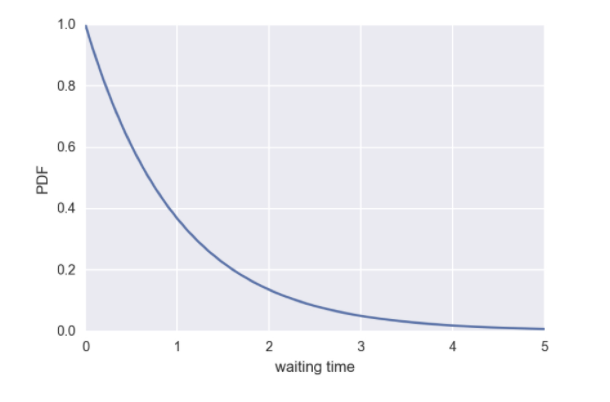
This distribution is not peaked



### Exponential CDF
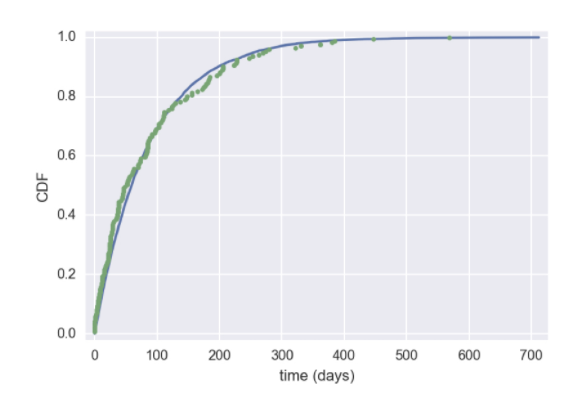
e.g. time between nuclear incidents. 

Green is the ecdf of our data and blue is the exponential distribution using the mean of our data. The overlap shows that this could be a Exponential Distribution.
